# Analysis and Visualisation of Tour de France winner data

Dataset was downloaded from Kaggle (link provided below). I will run through some exploratory data analyis to see if there are any common trends or notable relationships in the datasets.

Max Barnes

data = https://www.kaggle.com/jessemostipak/tour-de-france-winners

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 50)

In [2]:
stages = pd.read_csv('tdf_stages.csv')
stages.head()

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA


In [3]:
winners = pd.read_csv('tdf_winners.csv')
winners.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


## Data cleaning

In [4]:
stages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stage           2236 non-null   object 
 1   Date            2236 non-null   object 
 2   Distance        2236 non-null   float64
 3   Origin          2236 non-null   object 
 4   Destination     2236 non-null   object 
 5   Type            2236 non-null   object 
 6   Winner          2236 non-null   object 
 7   Winner_Country  2184 non-null   object 
dtypes: float64(1), object(7)
memory usage: 139.9+ KB


#### Stage is object type:

There is a stage called prologue (P), this is raced before stage 1, it is usually less than 8km and the winner wears the leaders yellow jersey for stage 1.

Prologues aren’t held every year, but when contested, the short distance gives fans immediate knowledge of just how fast cyclists can pedal. Prologues also provide the first look at the condition or lack of condition of overall title favorites, and showcase the most technological advances in bikes, wheels, helmets, clothing, and so on.
Some of the stage are also split into substages i.e 8a, 8b, 8c.

#### Date is object type:

We want to amend date so it shows just the year and is an integer.

In [5]:
# For dates we only want the year
stages['Date'] = stages['Date'].str[0:4].astype(int)
stages.head()

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA


In [6]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

Same issue with the date here.

In [7]:
winners['start_date'] = winners['start_date'].str[0:4].astype(int)

We can also perform some feature engineering to get the average speed of the winning riders.

In [8]:
winners['average_speed'] = winners['distance'] / winners['time_overall']
winners[10:15]

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,average_speed
10,11,1913,Philippe Thys,Peugeot–Wolber,5287.0,197.900000,0.135556,1,8,NaN,NaN,23,1889-10-08,1971-01-16,NaN,Le basset (The Basset Hound),Anderlecht,Belgium,Belgium,26.715513
11,12,1914,Philippe Thys,Peugeot–Wolber,5380.0,200.480000,0.016944,1,15,NaN,NaN,24,1889-10-08,1971-01-16,NaN,Le basset (The Basset Hound),Anderlecht,Belgium,Belgium,26.835595
12,13,1919,Firmin Lambot,La Sportive,5560.0,231.120833,1.715000,1,2,NaN,NaN,33,1886-03-14,1964-01-19,NaN,NaN,Florennes,Belgium,Belgium,24.056680
13,14,1920,Philippe Thys,La Sportive,5503.0,228.603611,0.965833,4,14,NaN,NaN,30,1889-10-08,1971-01-16,NaN,Le basset (The Basset Hound),Anderlecht,Belgium,Belgium,24.072236
14,15,1921,Léon Scieur,La Sportive,5485.0,221.840556,0.305000,2,14,NaN,NaN,33,1888-03-18,1969-10-07,NaN,NaN,Florennes,Belgium,Belgium,24.724965


## Visualising some of the data about the winners

In [9]:
from scipy import stats

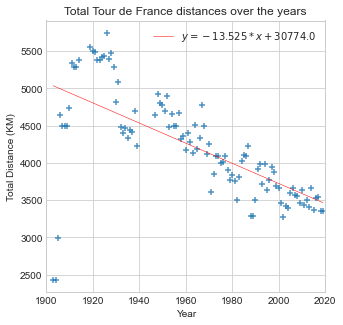

In [10]:
# Year vs distance
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(5,5))

slope, intercept, r_value, pv, se = stats.linregress(winners['start_date'], winners['distance'])
sns.regplot(x=winners['start_date'],y=winners['distance'], marker='+', ci=None, 
            line_kws = {'color': 'red', 'lw':0.5, 'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})

ax.set_xlim([1900, 2020]);
ax.legend()
ax.set(title='Total Tour de France distances over the years',
       xlabel='Year',
       ylabel='Total Distance (KM)');

We can see that the race has been getting shorter ever since it began, on average it has been getting shorter by 13.5km per year. It is likely that there will be a lower limit that the race will converge to as it can't decrease forever, we can see that over the last 20 years the points have stayed around the 3500km area which could imply that the organisers have reached their sweet spot however this is only something we will be able to confirm in the future. The longest ever race was 5745km and was in 1926. It was won by Lucien Buysse of Belgium, racing for Automoto-Hutchinson.

In [11]:
winners[winners['distance']==winners['distance'].max()]

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,average_speed
19,20,1926,Lucien Buysse,Automoto–Hutchinson,5745.0,238.740278,1.373611,2,8,NaN,NaN,33,1892-09-11,1980-01-03,NaN,NaN,Wontergem,Belgium,Belgium,24.063807


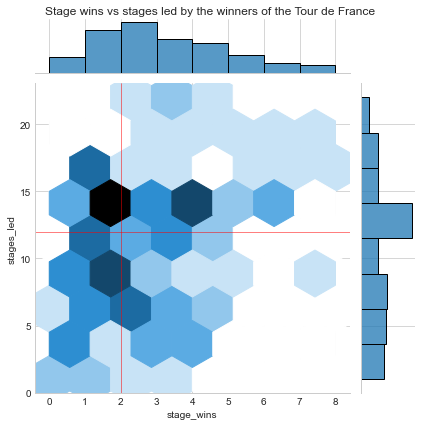

In [12]:
# Now lets look at number of stage wins & stages led, remember a rider can win GC without winning a stage.
ax = sns.jointplot(x=winners['stage_wins'],
                   y=winners['stages_led'],
                   kind='hex');
ax.fig.suptitle('Stage wins vs stages led by the winners of the Tour de France');
ax.fig.subplots_adjust(top=0.95) # Reduce plot to make room
ax.ax_joint.axhline(winners['stages_led'].median(), c='red', lw=0.5);
ax.ax_joint.axvline(winners['stage_wins'].median(), c='red', lw=0.5);

In [13]:
winners['stage_wins'].median(), winners['stages_led'].median()

(2.0, 12.0)

Here we use the median as our average due to the distribution of the data, we can see that the average stages won by a Tour de France winner is 2 and the average number of stages led is 12.

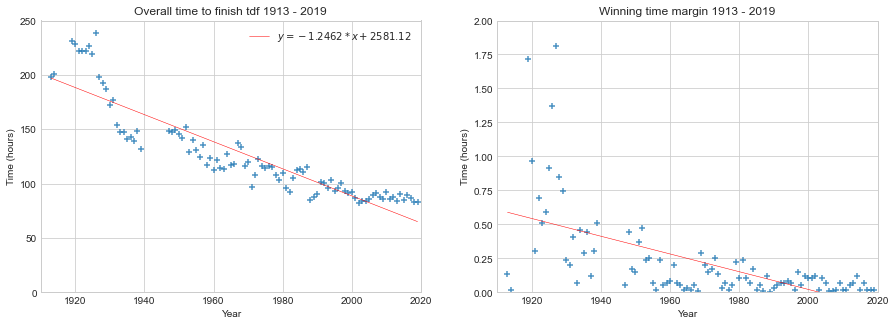

In [14]:
# Now we can look at the times taken to complete the tdf, times are recorded in hours and distance in KM.
# There are 8 missing values from 1905 - 1912 so we will dismiss data before 1913.
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

slope, intercept, r_value, pv, se = stats.linregress(winners['start_date'][10:], winners['time_overall'][10:])
sns.regplot(x=winners['start_date'][10:], y=winners['time_overall'][10:], marker='+', ci=None, ax=ax0,
            line_kws = {'color': 'red', 'lw':0.5, 'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)});
ax0.set(title='Overall time to finish tdf 1913 - 2019',
       xlabel='Year',
       ylabel='Time (hours)');
ax0.legend();
ax0.set_xlim([1910,2020]);
ax0.set_ylim([0,250]);

sns.regplot(x=winners['start_date'][10:], y=winners['time_margin'][10:], marker='+', ci=None, ax=ax1,
            line_kws = {'color': 'red', 'lw':0.5});
ax1.set(title='Winning time margin 1913 - 2019',
        xlabel='Year',
        ylabel='Time (hours)');
ax1.set_ylim([0,2]);
ax1.set_xlim([1910,2020]);

In [15]:
winners[winners['time_overall']==winners['time_overall'].max()]

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,average_speed
19,20,1926,Lucien Buysse,Automoto–Hutchinson,5745.0,238.740278,1.373611,2,8,NaN,NaN,33,1892-09-11,1980-01-03,NaN,NaN,Wontergem,Belgium,Belgium,24.063807


Unsurprisingly the longest race was also the race that took the longest time to complete, we can also see that this race had the third largest time margin. The overall time has been decreasing over time, similar to the overall distance.

The graphs do not follow a straight line, they are the time and time cannot be negative hence it cannot be straight. They would be better represented by an exponential distribution so I will use the scipy.optimise package to fit the curve.

In [16]:
from scipy.optimize import curve_fit

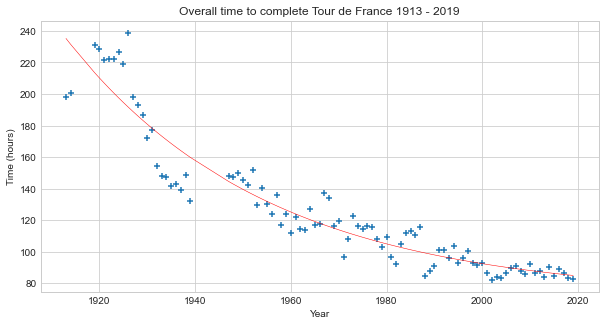

In [17]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = winners['start_date'][10:]
ydata = winners['time_overall'][10:]
fig, ax0 = plt.subplots(figsize=(10,5))

ax0.scatter(xdata, ydata, marker='+')
popt, pcov = curve_fit(func, xdata, ydata, p0=[0.5, 1e-10, 0.5], maxfev=5000);

ax0.plot(xdata, func(xdata, *popt), 'r-', linewidth=0.5);
ax0.set(title='Overall time to complete Tour de France 1913 - 2019', xlabel='Year', ylabel='Time (hours)');

Here we have a better fit than the straight line, we can see that the overall time to complete the Tour is converging in to 80 hours which is roughly a third of the time taken to complete the longest Tour which was approximately 240 hour.

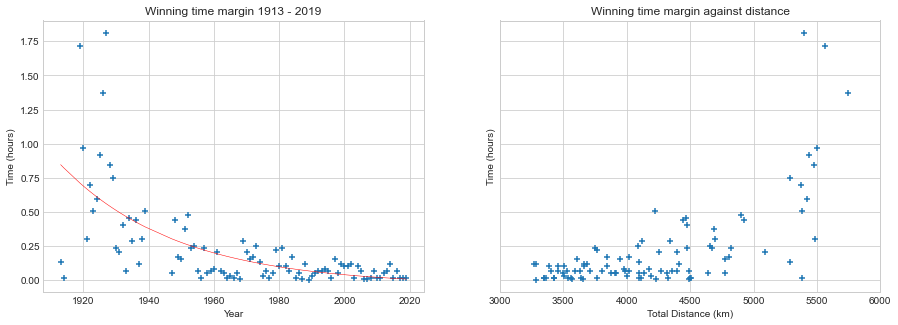

In [18]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = winners['start_date'][10:]
ydata = winners['time_margin'][10:]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax0.scatter(xdata, ydata, marker='+')
popt, pcov = curve_fit(func, xdata, ydata, p0=[0.5, 1e-6, 0.5], maxfev=5000);

ax0.plot(xdata, func(xdata, *popt), 'r-', linewidth=0.5);
ax0.set(title='Winning time margin 1913 - 2019', xlabel='Year', ylabel='Time (hours)');

# relationship with time marign and distance.
ax1.scatter(x=winners['distance'][10:], y=winners['time_margin'][10:], marker='+')
ax1.set_xlim([3000,6000])
ax1.set(title='Winning time margin against distance',
        xlabel='Total Distance (km)',
        ylabel='Time (hours)');

This is interesting, we can see that the winning time margin has rapidly decreased over time hence this implies it is becoming a closer competition, this could be a deliberate tactic used by race organisers. We can say that the margin for error for the winning rider has been getting smaller ever since the race began, as the total race distance decreases the time margin between the winner and the runner up becomes smaller and converges to 0.

The table below shows the time margins in descending order, we can see that the largest time margin (not including pre 1913) was in 1927, this was not the longest race however incomparison to todays distances (~3500-4000km) this was a very long race. The winner Nicolas Frantz was leading on 14 of the stages and a year later in 1928 he won again leading 22 of the 24 stages, this is the highest number of stages won by any winner of the Tour de France!

In [19]:
winners[10:].sort_values(['time_margin'], ascending=False).head(10)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,average_speed
20,21,1927,Nicolas Frantz,Alcyon–Dunlop,5398.0,198.278333,1.811389,3,14,NaN,NaN,27,1899-11-04,1985-11-08,NaN,NaN,Mamer,Luxembourg,Luxembourg,27.224356
12,13,1919,Firmin Lambot,La Sportive,5560.0,231.120833,1.715000,1,2,NaN,NaN,33,1886-03-14,1964-01-19,NaN,NaN,Florennes,Belgium,Belgium,24.056680
19,20,1926,Lucien Buysse,Automoto–Hutchinson,5745.0,238.740278,1.373611,2,8,NaN,NaN,33,1892-09-11,1980-01-03,NaN,NaN,Wontergem,Belgium,Belgium,24.063807
13,14,1920,Philippe Thys,La Sportive,5503.0,228.603611,0.965833,4,14,NaN,NaN,30,1889-10-08,1971-01-16,NaN,Le basset (The Basset Hound),Anderlecht,Belgium,Belgium,24.072236
18,19,1925,Ottavio Bottecchia,Automoto–Hutchinson,5440.0,219.171667,0.915000,4,13,NaN,NaN,30,1894-08-01,1927-06-15,NaN,NaN,San Martino di Colle Umberto,Italy,Italy,24.820727
21,22,1928,Nicolas Frantz,Alcyon–Dunlop,5476.0,192.816111,0.847222,5,22,NaN,NaN,28,1899-11-04,1985-11-08,NaN,NaN,Mamer,Luxembourg,Luxembourg,28.400116
22,23,1929,Maurice De Waele,Alcyon–Dunlop,5286.0,186.654167,0.745556,1,16,NaN,NaN,32,1896-12-27,1952-02-14,NaN,NaN,Lovendegem,Belgium,Belgium,28.319754
15,16,1922,Firmin Lambot,Peugeot–Wolber,5375.0,222.135000,0.694722,0,3,NaN,NaN,36,1886-03-14,1964-01-19,NaN,NaN,Florennes,Belgium,Belgium,24.196997
17,18,1924,Ottavio Bottecchia,Automoto,5425.0,226.305833,0.593056,4,15,NaN,NaN,29,1894-08-01,1927-06-15,NaN,NaN,San Martino di Colle Umberto,Italy,Italy,23.971985
16,17,1923,Henri Pélissier,Automoto–Hutchinson,5386.0,222.258333,0.508333,3,6,NaN,NaN,34,1889-01-22,1935-05-01,NaN,NaN,Paris,France,France,24.233062


Next I want to look at the average speed of the riders. There are 8 missing values from 1905 - 1912 so we will dismiss data before 1913.

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,average_speed
84,85,1998,Marco Pantani,Mercatone Uno–Bianchi,3875.0,92.829444,0.050833,2,7,1.72,57.0,28,1970-01-13,2004-02-14,NaN,"Il Pirata (The pirate), Elefantino (The little...",Cesena,Italy,Italy,41.743221
91,92,2005,Lance Armstrong,Discovery Channel,3593.0,86.250556,0.067778,1,17,1.77,75.0,33,1971-09-18,NaN,Lance Edward Armstrong,"Le Boss, Big Tex",Plano,USA,United States,41.657703
103,104,2017,Chris Froome,Team Sky,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain,40.996606
89,90,2003,Lance Armstrong,U.S. Postal Service,3427.0,83.686667,0.016944,1,13,1.77,75.0,31,1971-09-18,NaN,Lance Edward Armstrong,"Le Boss, Big Tex",Plano,USA,United States,40.950370
92,93,2006,Óscar Pereiro,Caisse d'Epargne–Illes Balears,3657.0,89.674167,0.008889,0,8,1.77,68.0,28,1977-08-03,NaN,Óscar Pereiro Sío,NaN,Mos,Spain,Spain,40.780976


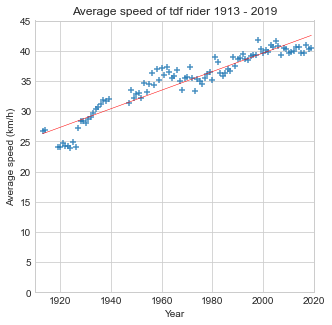

In [20]:
fig, ax = plt.subplots(figsize=(5,5))

sns.regplot(x=winners['start_date'][10:], y=winners['average_speed'][10:], marker='+', ci=None, 
            line_kws = {'color': 'red', 'lw':0.5});
ax.set(title='Average speed of tdf rider 1913 - 2019',
       xlabel='Year',
       ylabel='Average speed (km/h)');
ax.set_xlim([1910,2020]);
ax.set_ylim([0,45]);

winners.sort_values(['average_speed'], ascending=False).head()

Here we can see that the average speed of the riders has been increasing, this is likely due to a variety of reasons such as training methods and nutrition as well as advancements in cycling technology. It could also be a factor of the decrased overall race distance that we noticed earlier, the riders are able to push themselves harder as they are not riding such long distances.

The fastest average speed was recorded in 1998 by Marco Patani and the second was Lance Armstrong in 2005, it is very well known that athletes use performance enhancing drugs but we probably won't see speeds like this again as the sport was much less controlled than it is now. Atheletes are subjected to more drug testing now so it's much harder to get through while doping.

In [21]:
winners.groupby(['winner_name', 'nationality']).size().sort_values(ascending=False).head(10)

winner_name          nationality   
Lance Armstrong       United States    7
Bernard Hinault       France           5
Jacques Anquetil      France           5
Miguel Induráin       Spain            5
Eddy Merckx           Belgium          5
Chris Froome          Great Britain    4
Louison Bobet         France           3
Philippe Thys         Belgium          3
Greg LeMond           United States    3
Lucien Petit-Breton   France           2
dtype: int64

Here we can see that Lance Armstrong has won more Tour de France races than any other cyclist ever, however, in January 2013 he confessed to doping and has been stripped of his titles.

## Looking at the stages of the tdf

We have data about the stages from 1903 to 2017.

In [22]:
stages.head()

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA


In [23]:
stages.groupby(['Winner', 'Winner_Country']).size().sort_values(ascending=False).head(10)

Winner                Winner_Country
Eddy Merckx           BEL               34
Mark Cavendish        GBR               30
Bernard Hinault       FRA               28
André Leducq          FRA               24
André Darrigade       FRA               22
Lance Armstrong[n 1]  USA               20
Nicolas Frantz        LUX               20
François Faber        LUX               18
Jean Alavoine         FRA               17
Charles Pélissier     FRA               16
dtype: int64

Over the 114 years of racing data we have there have been 2236 stages races, these include the (usually) 21 stages of the main race and on some occasions a prologue which is held before the first stage. The prologues is a sprint and the winner gets to wear the yellow jersey on stage 1.

Eddy Merckx has won the most ever stages of the Tour de France which is a very notable achievement, we can also see that he has won 5 overall Tour de France races. It is worth noting that a cyclist can win the Tour even if they do not win a single stage!